In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv('C:\\Users\\oyedeepak\\Downloads\\Assignment\\Forecasting\\PlasticSales.csv', index_col= 'Month', parse_dates= True)
df.head()

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030


In [3]:
df.index

DatetimeIndex(['2049-01-01', '2049-02-01', '2049-03-01', '2049-04-01',
               '2049-05-01', '2049-06-01', '2049-07-01', '2049-08-01',
               '2049-09-01', '2049-10-01', '2049-11-01', '2049-12-01',
               '2050-01-01', '2050-02-01', '2050-03-01', '2050-04-01',
               '2050-05-01', '2050-06-01', '2050-07-01', '2050-08-01',
               '2050-09-01', '2050-10-01', '2050-11-01', '2050-12-01',
               '2051-01-01', '2051-02-01', '2051-03-01', '2051-04-01',
               '2051-05-01', '2051-06-01', '2051-07-01', '2051-08-01',
               '2051-09-01', '2051-10-01', '2051-11-01', '2051-12-01',
               '2052-01-01', '2052-02-01', '2052-03-01', '2052-04-01',
               '2052-05-01', '2052-06-01', '2052-07-01', '2052-08-01',
               '2052-09-01', '2052-10-01', '2052-11-01', '2052-12-01',
               '2053-01-01', '2053-02-01', '2053-03-01', '2053-04-01',
               '2053-05-01', '2053-06-01', '2053-07-01', '2053-08-01',
      

In [4]:
df.index.freq= 'MS'
df.index

DatetimeIndex(['2049-01-01', '2049-02-01', '2049-03-01', '2049-04-01',
               '2049-05-01', '2049-06-01', '2049-07-01', '2049-08-01',
               '2049-09-01', '2049-10-01', '2049-11-01', '2049-12-01',
               '2050-01-01', '2050-02-01', '2050-03-01', '2050-04-01',
               '2050-05-01', '2050-06-01', '2050-07-01', '2050-08-01',
               '2050-09-01', '2050-10-01', '2050-11-01', '2050-12-01',
               '2051-01-01', '2051-02-01', '2051-03-01', '2051-04-01',
               '2051-05-01', '2051-06-01', '2051-07-01', '2051-08-01',
               '2051-09-01', '2051-10-01', '2051-11-01', '2051-12-01',
               '2052-01-01', '2052-02-01', '2052-03-01', '2052-04-01',
               '2052-05-01', '2052-06-01', '2052-07-01', '2052-08-01',
               '2052-09-01', '2052-10-01', '2052-11-01', '2052-12-01',
               '2053-01-01', '2053-02-01', '2053-03-01', '2053-04-01',
               '2053-05-01', '2053-06-01', '2053-07-01', '2053-08-01',
      

In [5]:
df.head()

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030


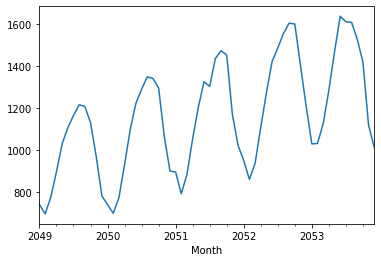

In [6]:
df['Sales'].plot()


In [7]:
### Simple Exponential Smoothing ###

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha= 2/(span+1)

df['EWMA12']= df['Sales'].ewm(alpha= alpha, adjust= False).mean()

In [8]:
model_ses12=SimpleExpSmoothing(df['Sales'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,EWMA12,SES12
Month,,,
2049-01-01,742,742.000000,742.000000
2049-02-01,697,735.076923,735.076923
2049-03-01,776,741.372781,741.372781
2049-04-01,898,765.469276,765.469276
2049-05-01,1030,806.166311,806.166311


In [9]:
### Double Exponential Smoothing ###

from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12= ExponentialSmoothing(df['Sales'], trend = 'add')
fitted_model= mod_add12.fit()
df['DESadd12']= fitted_model.fittedvalues.shift(-1)
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Sales,EWMA12,SES12,DESadd12
Month,,,,
2049-01-01,742,742.000000,742.000000,742.0
2049-02-01,697,735.076923,735.076923,652.0
2049-03-01,776,741.372781,741.372781,855.0
2049-04-01,898,765.469276,765.469276,1020.0
2049-05-01,1030,806.166311,806.166311,1162.0


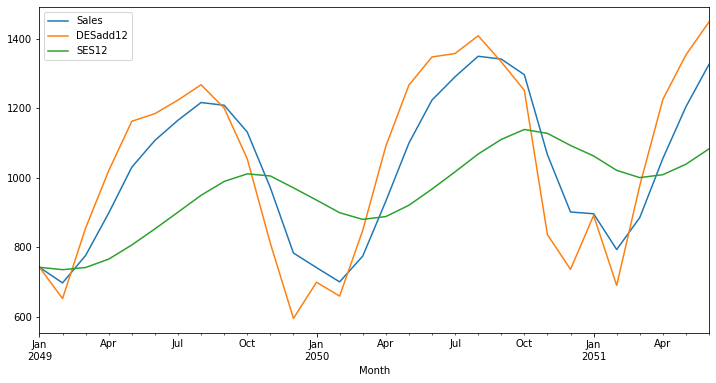

In [10]:
df[['Sales','DESadd12','SES12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [11]:
df['DESmul12']= ExponentialSmoothing(df['Sales'], trend= 'mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Sales,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
2049-01-01,742,742.000000,742.000000,742.0,741.999841
2049-02-01,697,735.076923,735.076923,652.0,654.729111
2049-03-01,776,741.372781,741.372781,855.0,863.954089
2049-04-01,898,765.469276,765.469276,1020.0,1039.180412
2049-05-01,1030,806.166311,806.166311,1162.0,1181.403118


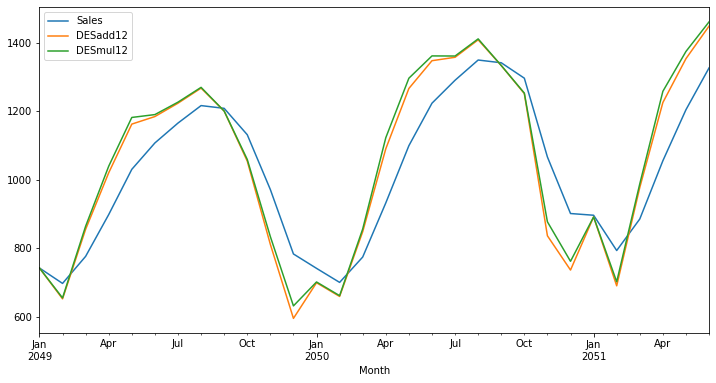

In [12]:
df[['Sales','DESadd12','DESmul12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [13]:
### Triple Exponential Smoothing ###

df['TESadd12'] = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
2049-01-01,742,742.000000,742.000000,742.0,741.999841,736.109023
2049-02-01,697,735.076923,735.076923,652.0,654.729111,696.481065
2049-03-01,776,741.372781,741.372781,855.0,863.954089,777.867975
2049-04-01,898,765.469276,765.469276,1020.0,1039.180412,926.660612
2049-05-01,1030,806.166311,806.166311,1162.0,1181.403118,1051.501441


In [14]:
### Triple Exponential Smoothing ###

df['TESmul12'] = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
2049-01-01,742,742.000000,742.000000,742.0,741.999841,736.109023,743.832032
2049-02-01,697,735.076923,735.076923,652.0,654.729111,696.481065,694.668542
2049-03-01,776,741.372781,741.372781,855.0,863.954089,777.867975,764.646053
2049-04-01,898,765.469276,765.469276,1020.0,1039.180412,926.660612,906.958992
2049-05-01,1030,806.166311,806.166311,1162.0,1181.403118,1051.501441,1034.000805


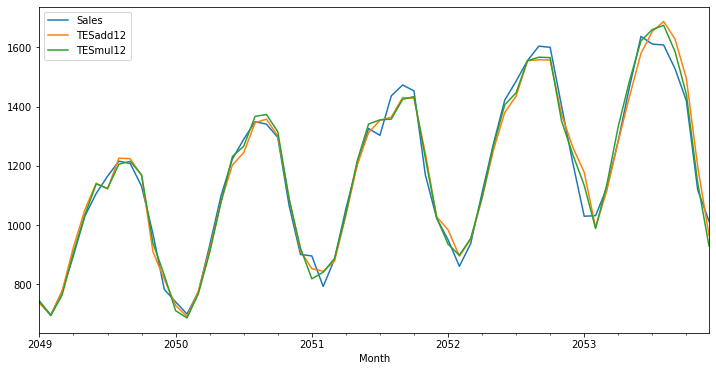

In [15]:
df[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

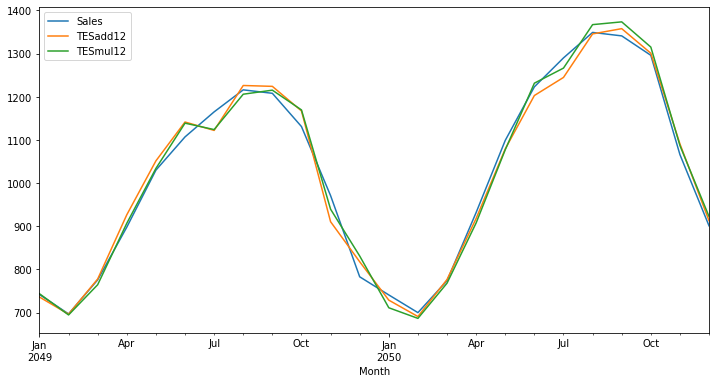

In [16]:
df[['Sales','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [17]:
df_mod = df.drop(df.tail(1).index,inplace=False) # drop last 1 rows
df_mod.tail()

,Sales,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
2053-07-01,1611,1375.867798,1375.867798,1585.0,1585.412951,1653.658965,1660.069836
2053-08-01,1608,1411.580444,1411.580444,1605.0,1605.005587,1687.317859,1674.115548
2053-09-01,1528,1429.491145,1429.491145,1448.0,1451.980100,1628.108242,1586.024460
2053-10-01,1420,1428.030969,1428.030969,1312.0,1319.633508,1495.218204,1441.851882
2053-11-01,1119,1380.487743,1380.487743,818.0,881.803521,1197.664430,1142.391014


In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
r_ewma = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['EWMA12']))
r_ses = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['SES12']))
r_desadd = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['DESadd12']))
r_desmul = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['DESmul12']))
r_tesadd = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['TESadd12']))
r_tesmul = np.sqrt(mean_squared_error(df_mod['Sales'], df_mod['TESmul12']))

In [20]:
r_df = [['EWMA12', r_ewma], ['SES12', r_ses], ['DESadd12', r_desadd], ['DESmul12', r_desmul], ['TESadd12', r_tesadd], ['TESmul12', r_tesmul]]

In [21]:
RMSE  = pd.DataFrame(r_df, columns = ['Model', 'RMSE']) 


In [22]:
RMSE

,Model,RMSE
0,EWMA12,194.899420
1,SES12,194.899420
2,DESadd12,124.626289
3,DESmul12,123.017828
4,TESadd12,43.019375
5,TESmul12,35.399981


In [23]:
#So, from the above data, we can see that TESmul12 has least RMSE. Thus, TESmul12 is a very good model compared to others!